# Quantum gates and circuits

Quantum gates and circuits are essential when working on quantum computing. Here we describe basic treatment of them in QURI Parts.

## Prerequisite

QURI Parts modules used in this tutorial: `quri-parts-circuit`, `quri-parts-core`, `quri-parts-braket`, `quri-parts-cirq`, `quri-parts-qiskit`, `quri-parts-qulacs`, and `quri-parts-tket`. You can install them as follows:

In [ ]:
!pip install "quri-parts[braket,cirq,qiskit,qulacs,tket]" pylatexenc

## QuantumGate object

In QURI Parts, a quantum gate is represented by a `QuantumGate` object (more precisely `NamedTuple`). A `QuantumGate` contains not only the kind of the gate but also some additional information such as gate parameters and qubits on which the gate acts. You can create gate objects using `QuantumGate`:

In [ ]:
from math import pi
from quri_parts.circuit import QuantumGate

gates = [
    # X gate acting on qubit 0
    QuantumGate("X", target_indices=(0,)),
    # Rotation gate acting on qubit 1 with angle pi/3
    QuantumGate("RX", target_indices=(1,), params=(pi/3,)),
    # CNOT gate on control qubit 2 and target qubit 1
    QuantumGate("CNOT", target_indices=(1,), control_indices=(2,)),
]

for gate in gates:
    print(gate)

QuantumGate(name='X', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='RX', target_indices=(1,), control_indices=(), classical_indices=(), params=(1.0471975511965976,), pauli_ids=(), unitary_matrix=())
QuantumGate(name='CNOT', target_indices=(1,), control_indices=(2,), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())


However it is more convenient to use factory functions:

In [ ]:
from quri_parts.circuit import X, RX, CNOT

gates = [
    # X gate acting on qubit 0
    X(0),
    # Rotation gate acting on qubit 1 with angle pi/3
    RX(1, pi/3),
    # CNOT gate on control qubit 2 and target qubit 1
    CNOT(2, 1),
]

for gate in gates:
    print(gate)

QuantumGate(name='X', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='RX', target_indices=(1,), control_indices=(), classical_indices=(), params=(1.0471975511965976,), pauli_ids=(), unitary_matrix=())
QuantumGate(name='CNOT', target_indices=(1,), control_indices=(2,), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())


In QURI Parts single-qubit rotation gates are defined as follows:
$$
\begin{align*}
  R_X(\theta) &= \exp\left( -i\frac{\theta}{2} X\right) \\
  R_Y(\theta) &= \exp\left( -i\frac{\theta}{2} Y\right) \\
  R_Z(\theta) &= \exp\left( -i\frac{\theta}{2} Z\right) \\
\end{align*}
$$

where $\theta$ is called the angle of the gate.

You can access (but not set) attributes of a gate object:

In [ ]:
from quri_parts.circuit import PauliRotation

x_gate = X(0)
print(f"name: {x_gate.name}, target: {x_gate.target_indices}")

rx_gate = RX(1, pi/3)
print(f"name: {rx_gate.name}, target: {rx_gate.target_indices}, angle: {rx_gate.params[0]}")

cnot_gate = CNOT(2, 1)
print(f"name: {cnot_gate.name}, control: {cnot_gate.control_indices}, target: {cnot_gate.target_indices}")

pauli_rot_gate = PauliRotation(target_indices=(0, 1, 2), pauli_ids=(1, 2, 3), angle=pi/3)
print(f"name: {pauli_rot_gate.name}, target: {pauli_rot_gate.target_indices}, pauli_ids: {pauli_rot_gate.pauli_ids}, angle: {pauli_rot_gate.params[0]}")

name: X, target: (0,)
name: RX, target: (1,), angle: 1.0471975511965976
name: CNOT, control: (2,), target: (1,)
name: PauliRotation, target: (0, 1, 2), pauli_ids: (1, 2, 3), angle: 1.0471975511965976


## QuantumCircuit object

You can construct a quantum circuit by specifying the number of qubits used in the circuit as follows:

In [ ]:
from quri_parts.circuit import QuantumCircuit

# Create a circuit for 3 qubits
circuit = QuantumCircuit(3)
# Add an already created QuantumGate object
circuit.add_gate(X(0))
# Or use methods to add gates
circuit.add_X_gate(0)
circuit.add_RX_gate(1, pi/3)
circuit.add_CNOT_gate(2, 1)
circuit.add_PauliRotation_gate(target_qubits=(0, 1, 2), pauli_id_list=(1, 2, 3), angle=pi/3)

A `QuantumCircuit` object has several properties:

In [ ]:
print("Qubit count:", circuit.qubit_count)
print("Circuit depth:", circuit.depth)

gates = circuit.gates # .gates returns the gates in the circuit as a sequence
print("# of gates in the circuit:", len(gates))
for gate in gates:
    print(gate)

Qubit count: 3
Circuit depth: 3
# of gates in the circuit: 5
QuantumGate(name='X', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='X', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='RX', target_indices=(1,), control_indices=(), classical_indices=(), params=(1.0471975511965976,), pauli_ids=(), unitary_matrix=())
QuantumGate(name='CNOT', target_indices=(1,), control_indices=(2,), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='PauliRotation', target_indices=(0, 1, 2), control_indices=(), classical_indices=(), params=(1.0471975511965976,), pauli_ids=(1, 2, 3), unitary_matrix=())


`QuantumCircuit` objects can be combined and extended:

In [ ]:
circuit2 = QuantumCircuit(3)
circuit2.add_Y_gate(1)
circuit2.add_H_gate(2)

combined = circuit + circuit2 # equivalent: combined = circuit.combine(circuit2)
print("Combined circuit:\n", combined.gates, "\n")

circuit2 += circuit # equivalent: circuit2.extend(circuit)
print("Extended circuit:\n", circuit2.gates, "\n")

# You can also embed a smaller circuit into a larger one
circuit_larger = QuantumCircuit(5)
circuit_larger.add_X_gate(3)
circuit_smaller = QuantumCircuit(3)
circuit_smaller.add_H_gate(0)
circuit_larger.extend(circuit_smaller)
print("Circuit extended by smaller one:\n", circuit_larger.gates)

Combined circuit:
 (QuantumGate(name='X', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=()), QuantumGate(name='X', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=()), QuantumGate(name='RX', target_indices=(1,), control_indices=(), classical_indices=(), params=(1.0471975511965976,), pauli_ids=(), unitary_matrix=()), QuantumGate(name='CNOT', target_indices=(1,), control_indices=(2,), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=()), QuantumGate(name='PauliRotation', target_indices=(0, 1, 2), control_indices=(), classical_indices=(), params=(1.0471975511965976,), pauli_ids=(1, 2, 3), unitary_matrix=()), QuantumGate(name='Y', target_indices=(1,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=()), QuantumGate(name='H', target_indices=(2,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())) 



## Mutable and immutable circuit objects

In the above example, a `QuantumCircuit` object is first created and then some gates are added to it. Contents (in this case a gate sequence) of the `QuantumCircuit` object are mutated in-place. Such an object is called a *mutable object*. A mutable circuit is useful to construct a circuit step-by-step, but mutability is often a cause of a trouble. For example, you may pass a circuit to a function and the function may alter contents of the circuit against your intention:

In [ ]:
def get_depth(circuit):
    # This function adds some gates despite its name!
    depth = circuit.depth
    circuit.add_X_gate(0)
    return depth

circuit = QuantumCircuit(2)
circuit.add_Z_gate(0)
circuit.add_H_gate(1)
print("# of gates:", len(circuit.gates))

depth = get_depth(circuit)
print("Circuit depth:", depth)
print("# of gates:", len(circuit.gates))

# of gates: 2
Circuit depth: 1
# of gates: 3


In the above example, the circuit depth of the argument and the circuit depth of the return value are different because of the additional gate operation in the `get_depth()` function.

This example is rather explicit and easy to avoid, but there are more subtle cases for which it is difficult to find the cause of the trouble. To prevent such a problem, you can use an *immutable* version (which we often call a *frozen* version) of the circuit obtained by `.freeze()`:

In [ ]:
circuit = QuantumCircuit(2)
circuit.add_Z_gate(0)
circuit.add_H_gate(1)
print("# of gates:", len(circuit.gates))

frozen_circuit = circuit.freeze()

try:
    depth = get_depth(frozen_circuit)
except Exception as e:
    print("ERROR:", e)

print("# of gates:", len(circuit.gates))

# of gates: 2
ERROR: 'quri_parts.rust.circuit.circuit.ImmutableQuantumCi' object has no attribute 'add_X_gate'
# of gates: 2


The frozen version does not have methods to alter its contents, so you can safely use one frozen circuit object in many places.

You can call `.freeze()` on the frozen version too. In this case, the frozen version itself is returned without copy:

In [ ]:
print(frozen_circuit)
frozen_circuit2 = frozen_circuit.freeze()
print(frozen_circuit2)

When you want to copy a circuit so that further modification does not affect the original one, call `.get_mutable_copy()`:

In [ ]:
copied_circuit = circuit.get_mutable_copy()
copied_circuit.add_X_gate(0)
print("# of gates in circuit:", len(circuit.gates))
print("# of gates in copied_circuit:", len(copied_circuit.gates))

# You can also copy a frozen circuit
copied_circuit2 = frozen_circuit.get_mutable_copy()
copied_circuit2.add_X_gate(0)
print("# of gates in frozen_circuit:", len(frozen_circuit.gates))
print("# of gates in copied_circuit2:", len(copied_circuit2.gates))

# of gates in circuit: 2
# of gates in copied_circuit: 3
# of gates in frozen_circuit: 2
# of gates in copied_circuit2: 3


## Circuit conversion

QURI Parts provides the circuit converter which generates the circuit object designed for other platforms/SDKs. If you want to get the Qulacs circuit, you can use `quri_parts.qulacs.circuit.convert_circuit` function.

In [ ]:
from quri_parts.qulacs.circuit import convert_circuit
qulacs_circuit = convert_circuit(circuit)
print(qulacs_circuit)

import qulacs
qulacs_state = qulacs.QuantumState(2)
qulacs_circuit.update_quantum_state(qulacs_state)
print(qulacs_state)

*** Quantum Circuit Info ***
# of qubit: 2
# of step : 1
# of gate : 2
# of 1 qubit gate: 2
Clifford  : yes
Gaussian  : no


 *** Quantum State ***
 * Qubit Count : 2
 * Dimension   : 4
 * State vector : 
(0.707107,0)
     (-0,-0)
(0.707107,0)
       (0,0)



The location of such a conversion function of course depends on the SDK/simulator you want to use, but it is typically located at `quri_parts.[SDK].circuit.convert_circuit`.

Currently, we support converting QURI Parts circuit into:

- Braket circuit: [API](https://quri-parts.qunasys.com/quri_parts/braket/quri_parts.braket.circuit#quri_parts.braket.circuit.convert_circuit)
- Cirq circuit: [API](https://quri-parts.qunasys.com/quri_parts/cirq/quri_parts.cirq.circuit#quri_parts.cirq.circuit.convert_circuit)
- Qulacs circuit: [API](https://quri-parts.qunasys.com/quri_parts/qulacs/quri_parts.qulacs.circuit#quri_parts.qulacs.circuit.convert_circuit)
- Qiskit circuit: [API](https://quri-parts.qunasys.com/quri_parts/qiskit/quri_parts.qiskit.circuit#quri_parts.qiskit.circuit.convert_circuit)
- TKet circuit: [API](https://quri-parts.qunasys.com/quri_parts/tket/quri_parts.tket.circuit#quri_parts.tket.circuit.convert_circuit)

## Circuit visualization

Sometimes it can be a help if you can see the circuit visually to make sure whether the cirucuit is what you really wanted. Here we shows several ways to do it.

### Using QURI Parts

QURI Parts has the function to display `...Circuit` with ASCII Art.

In [ ]:
from quri_parts.algo.ansatz import HardwareEfficient
from quri_parts.circuit.utils.circuit_drawer import draw_circuit

hwe_ansatz = HardwareEfficient(4, 2)
draw_circuit(hwe_ansatz)

   ___     ___                     ___     ___                     ___     ___  
  |PRY|   |PRZ|                   |PRY|   |PRZ|                   |PRY|   |PRZ| 
--|0  |---|1  |-------------●-----|11 |---|12 |-------------●-----|22 |---|23 |-
  |___|   |___|             |     |___|   |___|             |     |___|   |___| 
   ___     ___             _|_     ___     ___             _|_     ___     ___  
  |PRY|   |PRZ|           |CZ |   |PRY|   |PRZ|           |CZ |   |PRY|   |PRZ| 
--|2  |---|3  |-----●-----|9  |---|13 |---|14 |-----●-----|20 |---|24 |---|25 |-
  |___|   |___|     |     |___|   |___|   |___|     |     |___|   |___|   |___| 
   ___     ___     _|_             ___     ___     _|_             ___     ___  
  |PRY|   |PRZ|   |CZ |           |PRY|   |PRZ|   |CZ |           |PRY|   |PRZ| 
--|4  |---|5  |---|8  |-----●-----|15 |---|16 |---|19 |-----●-----|26 |---|27 |-
  |___|   |___|   |___|     |     |___|   |___|   |___|     |     |___|   |___| 
   ___     ___             _

### Using other libraries

If you want to get an image as a different form, you can convert `...Circuit` into other format such as qiskit's `QuantumCircuit` and call the method to draw.

Note that in many cases you should bind circuit parameters before conversion because most of the libraries don't have the concept of [ParametricCircuit](../../2_advanced/1_parametric/0_parametric_circuit/index.md).

#### qiskit

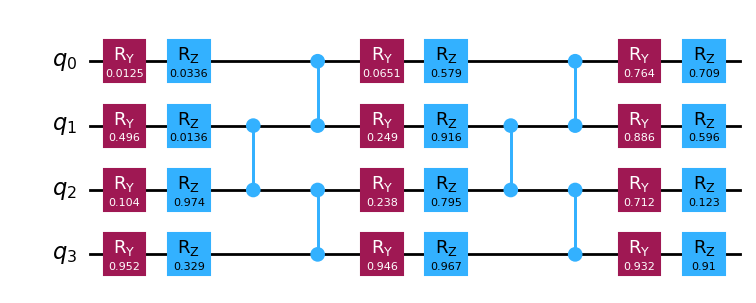

In [ ]:
import random

from quri_parts.algo.ansatz import HardwareEfficient
from quri_parts.qiskit.circuit import convert_circuit

hwe_ansatz = HardwareEfficient(4, 2)

# bind random parameters
circuit = hwe_ansatz.bind_parameters(
    [random.random() for _ in range(hwe_ansatz.parameter_count)]
)

qiskit_circuit = convert_circuit(circuit)
#qiskit_circuit.draw()  # default: ASCII art
qiskit_circuit.draw("mpl")

#### braket

In [ ]:
import random

from quri_parts.algo.ansatz import HardwareEfficient
from quri_parts.braket.circuit import convert_circuit

hwe_ansatz = HardwareEfficient(4, 2)

# bind random parameters
circuit = hwe_ansatz.bind_parameters(
    [random.random() for _ in range(hwe_ansatz.parameter_count)]
)

braket_circuit = convert_circuit(circuit)
print(braket_circuit)

T  : │     0      │     1      │  2  │  3  │     4      │     5      │  6  │  7  │     8      │     9      │
      ┌──────────┐ ┌──────────┐             ┌──────────┐ ┌──────────┐             ┌──────────┐ ┌──────────┐ 
q0 : ─┤ Ry(0.23) ├─┤ Rz(0.10) ├─────────●───┤ Ry(0.88) ├─┤ Rz(0.45) ├─────────●───┤ Ry(0.71) ├─┤ Rz(0.37) ├─
      └──────────┘ └──────────┘         │   └──────────┘ └──────────┘         │   └──────────┘ └──────────┘ 
      ┌──────────┐ ┌──────────┐       ┌─┴─┐ ┌──────────┐ ┌──────────┐       ┌─┴─┐ ┌──────────┐ ┌──────────┐ 
q1 : ─┤ Ry(0.43) ├─┤ Rz(0.59) ├───●───┤ Z ├─┤ Ry(0.91) ├─┤ Rz(0.38) ├───●───┤ Z ├─┤ Ry(0.92) ├─┤ Rz(0.44) ├─
      └──────────┘ └──────────┘   │   └───┘ └──────────┘ └──────────┘   │   └───┘ └──────────┘ └──────────┘ 
      ┌──────────┐ ┌──────────┐ ┌─┴─┐       ┌──────────┐ ┌──────────┐ ┌─┴─┐       ┌──────────┐ ┌──────────┐ 
q2 : ─┤ Ry(0.69) ├─┤ Rz(0.22) ├─┤ Z ├───●───┤ Ry(0.95) ├─┤ Rz(0.85) ├─┤ Z ├───●───┤ Ry(0.09) ├─┤ Rz(0.04) ├─
      └──────────┘ 

#### cirq

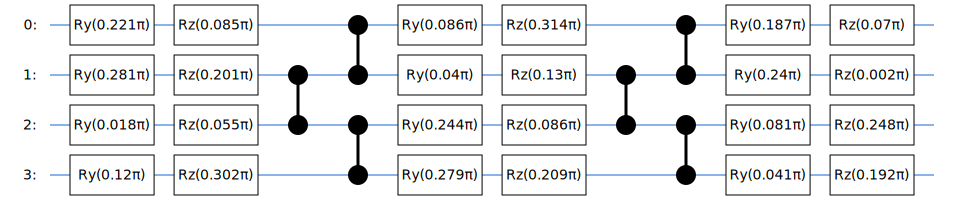

In [ ]:
import random

from quri_parts.algo.ansatz import HardwareEfficient
from quri_parts.cirq.circuit import convert_circuit

from cirq.contrib.svg import SVGCircuit

hwe_ansatz = HardwareEfficient(4, 2)

# bind random parameters
circuit = hwe_ansatz.bind_parameters(
    [random.random() for _ in range(hwe_ansatz.parameter_count)]
)

cirq_circuit = convert_circuit(circuit)
# print(cirq_circuit)  # ASCII art
SVGCircuit(cirq_circuit)

#### tket

In [ ]:
import random

from pytket.circuit.display import render_circuit_jupyter
from quri_parts.algo.ansatz import HardwareEfficient
from quri_parts.tket.circuit import convert_circuit

hwe_ansatz = HardwareEfficient(4, 2)

# bind random parameters
circuit = hwe_ansatz.bind_parameters(
    [random.random() for _ in range(hwe_ansatz.parameter_count)]
)

tket_circuit = convert_circuit(circuit)

render_circuit_jupyter(tket_circuit) # Render interactive circuit diagram